<a href="https://colab.research.google.com/github/HimanshuRajput013/DS_Case_Study_beer_overall_rating_Preication/blob/main/DS_Case_Study_beer_rating_Preication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Beer_Case_Study**

# **Obejective**
We have a beer data set for this beer dataset need to predicate overall rating for these we build ml model that can be Regression or Classification.


# **Problem description**

**1."review/overall" column is target varriable and ranges between 1.0 - 5.0.**

**2.We will find out how "beer/name", "beer/style" and "review/text" as features to predict the overall rating of the beer.**

**3.From review/text column we find out words strongly predict the overall rating of the beer.**

**4.Build a regression or classification model to predict the overall rating.**



# **Know Your Data**

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
import pickle

from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor
)
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from sklearn.linear_model import LinearRegression

import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
url = 'https://drive.google.com/file/d/1vaFIJLhKoOLIri_TS9v5WQ77hM9u0je2/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url,encoding ='latin')

In [ ]:
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [ ]:
df.describe(include='all')

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
count,37500.000000,37500.000000,37500.000000,37500.000000,37500,37500,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,37490,37500,3.750000e+04,7.856000e+03,7856,7.856000e+03,15314,37495
unique,NaN,NaN,NaN,NaN,1688,95,NaN,NaN,NaN,NaN,NaN,37482,37490,NaN,NaN,1432,NaN,2,7441
top,NaN,NaN,NaN,NaN,Founders Breakfast Stout,American Double / Imperial Stout,NaN,NaN,NaN,NaN,NaN,"The beer has a bit of a reddish color to it, w...","{'min': 0, 'hour': 0, 'mday': 10, 'sec': 1, 'y...",NaN,NaN,"Sep 14, 1980",NaN,Male,northyorksammy
freq,NaN,NaN,NaN,NaN,1883,4495,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,76,NaN,15069,141
mean,24951.887573,7.403725,21861.152027,3036.595120,NaN,NaN,3.900053,3.873240,3.88944,3.854867,3.922440,NaN,NaN,1.232794e+09,1.176705e+09,NaN,2.416303e+08,NaN,NaN
std,14434.009669,2.318145,18923.130832,5123.084675,NaN,NaN,0.588778,0.680865,0.70045,0.668068,0.716504,NaN,NaN,7.190955e+07,3.375514e+08,NaN,3.375514e+08,NaN,NaN
min,0.000000,0.100000,175.000000,1.000000,NaN,NaN,0.000000,1.000000,0.00000,1.000000,1.000000,NaN,NaN,9.262944e+08,7.034366e+08,NaN,-2.208960e+09,NaN,NaN
25%,12422.500000,5.400000,5441.000000,395.000000,NaN,NaN,3.500000,3.500000,3.50000,3.500000,3.500000,NaN,NaN,1.189194e+09,9.794810e+08,NaN,1.433628e+08,NaN,NaN
50%,24942.500000,6.900000,17538.000000,1199.000000,NaN,NaN,4.000000,4.000000,4.00000,4.000000,4.000000,NaN,NaN,1.248150e+09,1.100009e+09,NaN,3.183264e+08,NaN,NaN
75%,37416.750000,9.400000,34146.000000,1315.000000,NaN,NaN,4.500000,4.500000,4.50000,4.500000,4.500000,NaN,NaN,1.291330e+09,1.274973e+09,NaN,4.388544e+08,NaN,NaN


### Dataset Information

# 1. Data cleaning and Data preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [ ]:
df.shape

(37500, 19)

In [ ]:
df.nunique()

,0
index,37500
beer/ABV,126
beer/beerId,1731
beer/brewerId,212
beer/name,1688
beer/style,95
review/appearance,10
review/aroma,9
review/overall,10
review/palate,9


In [ ]:
# Visualizing the missing values in %
df.isnull().sum()*100/len(df)

,0
index,0.000000
beer/ABV,0.000000
beer/beerId,0.000000
beer/brewerId,0.000000
beer/name,0.000000
beer/style,0.000000
review/appearance,0.000000
review/aroma,0.000000
review/overall,0.000000
review/palate,0.000000


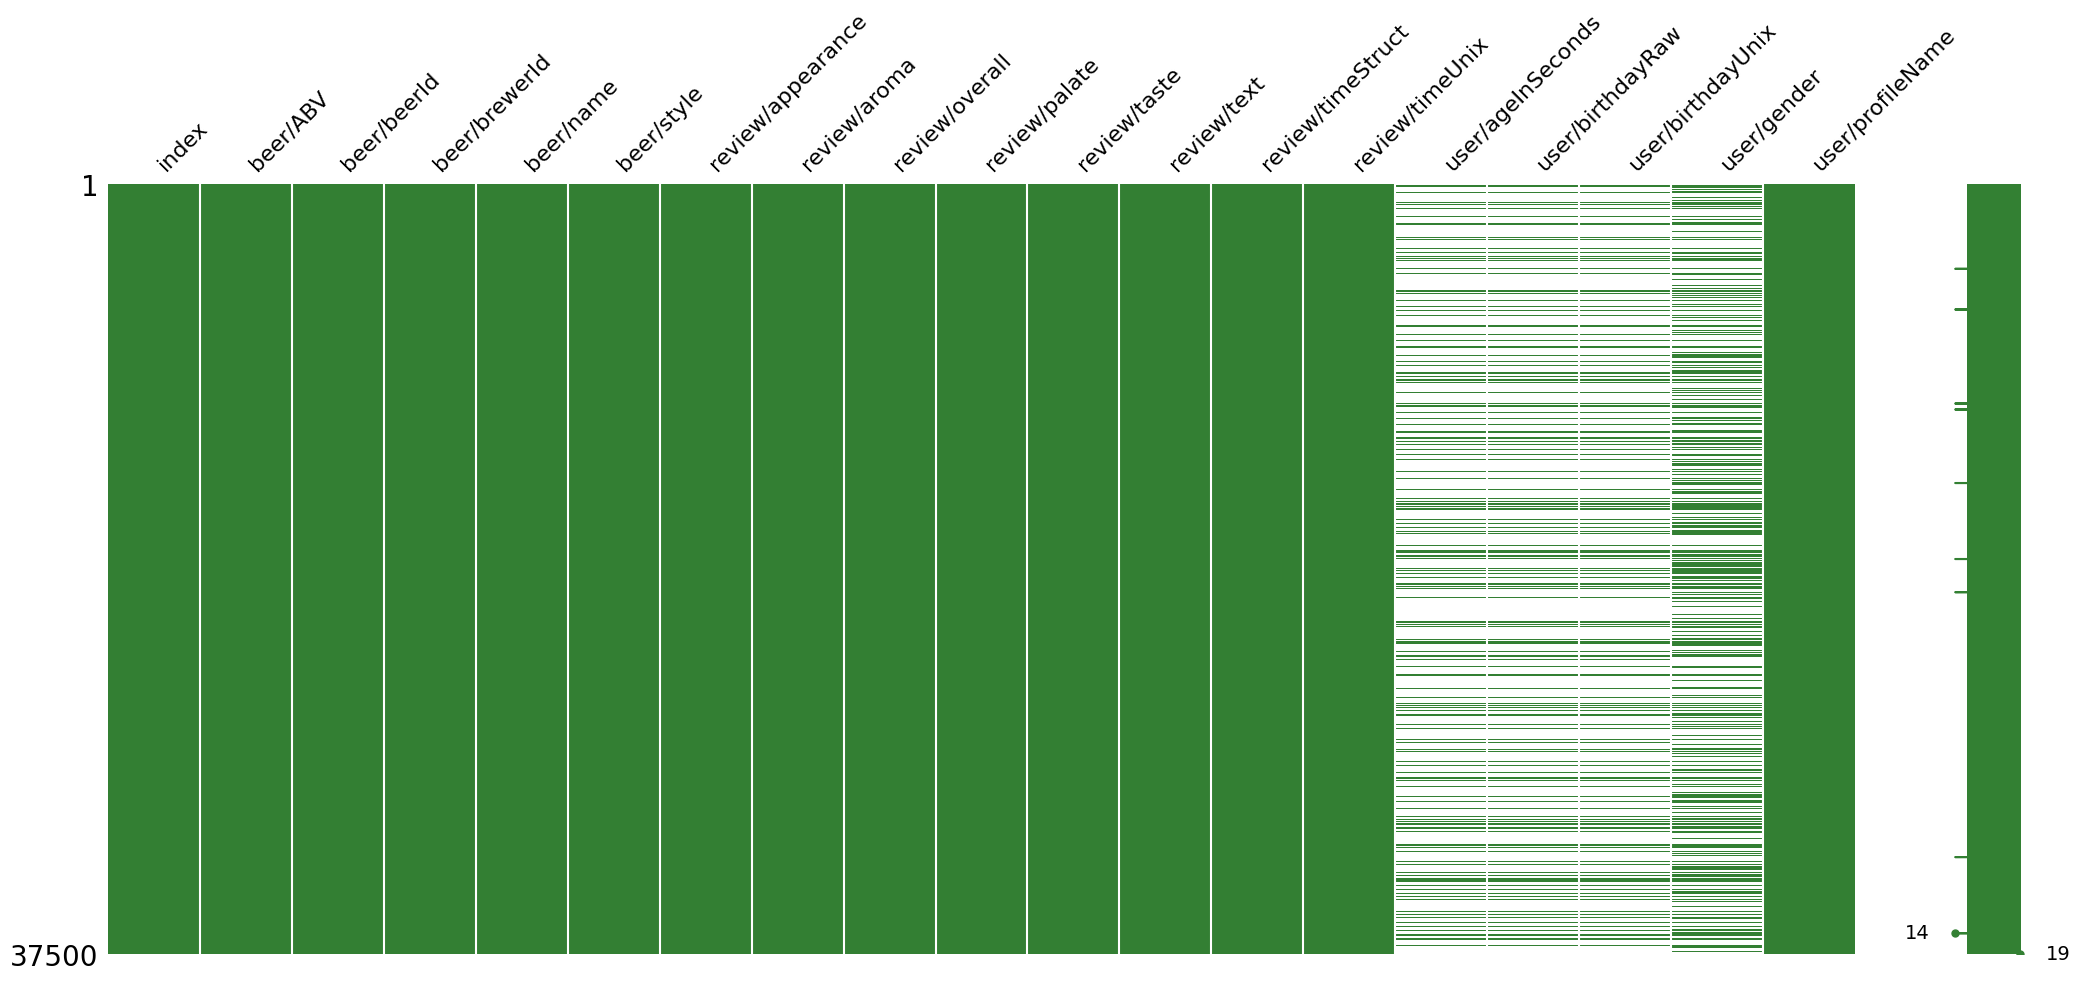

In [ ]:
msno.matrix(df, color=(0.2, 0.5, 0.2))
plt.show()

#After analyize null value we get some observation for columns:-
1.**reveiw/text** - 0.02% value missing that can handle by dropping rows.

2.**user/ageInSeconds** - 79% value is missing.we can drop this column because this column impact very less as compare to other column.

3.**user/birthdayRaw** - 79% value is missing.we can drop this column because this column impact very less as compare to other column.

4.**user/birthdayUnix** - 79% value is missing.we can drop this column because this column impact very less as compare to other column.

5.**user/gender** - 59.16% value is missing we will analiyze this column then decide we will drop column or add mode value for this.

6.**user/profileName** - very few values but this column contain user name which is not helpul to predict overall rating so we will drop this column.

In [ ]:
df = df.drop(['user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName'], axis = 1)

In [ ]:
df.isnull().sum()

,0
index,0
beer/ABV,0
beer/beerId,0
beer/brewerId,0
beer/name,0
beer/style,0
review/appearance,0
review/aroma,0
review/overall,0
review/palate,0


#**review/text** have only 10 rows which is very less so we can drop that rows.


In [ ]:
df = df.dropna(subset = ['review/text'])

In [ ]:
df.isnull().sum()

,0
index,0
beer/ABV,0
beer/beerId,0
beer/brewerId,0
beer/name,0
beer/style,0
review/appearance,0
review/aroma,0
review/overall,0
review/palate,0


# **'review/overall' Column Analyze, how much unique count in overall rating in each group.**

In [ ]:
value_counts = df['review/overall'].value_counts()
print(value_counts)

review/overall
4.0    13867
4.5     8662
3.5     6550
3.0     3319
5.0     2667
2.5     1193
2.0      807
1.5      248
1.0      176
0.0        1
Name: count, dtype: int64


**zero rating have only 1 review so we can drop that row.**

In [ ]:
df = df[df['review/overall'] != 0.0]

In [ ]:
value_counts = df['review/overall'].value_counts()
print(value_counts)

review/overall
4.0    13867
4.5     8662
3.5     6550
3.0     3319
5.0     2667
2.5     1193
2.0      807
1.5      248
1.0      176
Name: count, dtype: int64


#review/timeUnix column data in sec so convert it into datetime then we can utilize the data

In [ ]:
df['review/timeUnix'] = pd.to_datetime(df['review/timeUnix'], unit='s')

df['review_year'] = df['review/timeUnix'].dt.year
df['review_month'] = df['review/timeUnix'].dt.month
df['review_day'] = df['review/timeUnix'].dt.day


<ipython-input-17-1a85fe481dbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review/timeUnix'] = pd.to_datetime(df['review/timeUnix'], unit='s')
<ipython-input-17-1a85fe481dbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_year'] = df['review/timeUnix'].dt.year
<ipython-input-17-1a85fe481dbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [ ]:
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,review_year,review_month,review_day
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",2008-12-16 03:38:10,2008,12,16
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",2008-08-08 23:38:58,2008,8,8
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",2004-11-26 18:07:02,2004,11,26
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",2011-06-20 01:07:05,2011,6,20
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",2011-03-12 06:51:48,2011,3,12


Now we can drop these three column **'index', 'review/timeStruct', 'review/timeUnix'**

In [ ]:
df = df.drop(['index', 'review/timeStruct', 'review/timeUnix'], axis = 1)
df = df.reset_index(drop=True)
df.head()

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review_year,review_month,review_day
0,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,2008,12,16
1,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,2008,8,8
2,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,2004,11,26
3,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,2011,6,20
4,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,2011,3,12


In [ ]:
df.nunique()

,0
beer/ABV,126
beer/beerId,1731
beer/brewerId,212
beer/name,1688
beer/style,95
review/appearance,9
review/aroma,9
review/overall,9
review/palate,9
review/taste,9


**'beer/brewerId'** indicating the brewery which property may be respresent by ABV.If ABV contain same data we will replace 'beer/brewerId'.

In [ ]:
brewerId_stats = df.groupby('beer/brewerId')['beer/ABV'].agg(['min', 'max','mean', 'count']).reset_index()

# Sort by 'count' column in descending order
brewerId_stats_sorted = brewerId_stats .sort_values(by='count', ascending=False).reset_index(drop=True)

print(brewerId_stats_sorted)

     beer/brewerId  min   max      mean  count
0             1199  4.0  13.0  8.896660  14970
1              394  4.4  11.0  6.840688   2937
2            14879  4.3  11.3  8.749085   2349
3              263  4.3   8.0  5.764345   1809
4             3268  4.0  10.4  5.884417   1277
..             ...  ...   ...       ...    ...
207          23468  5.4   5.4  5.400000      1
208           3207  6.0   6.0  6.000000      1
209          14649  4.5   4.5  4.500000      1
210          15607  5.0   5.0  5.000000      1
211          18636  5.0   5.0  5.000000      1

[212 rows x 5 columns]


**After analyze BrewerID we can say that we have nothing to represent Breweries properties so we can link brewerID thats why so we will drop this column.**

# **Correlation Heatmap**

<Axes: >

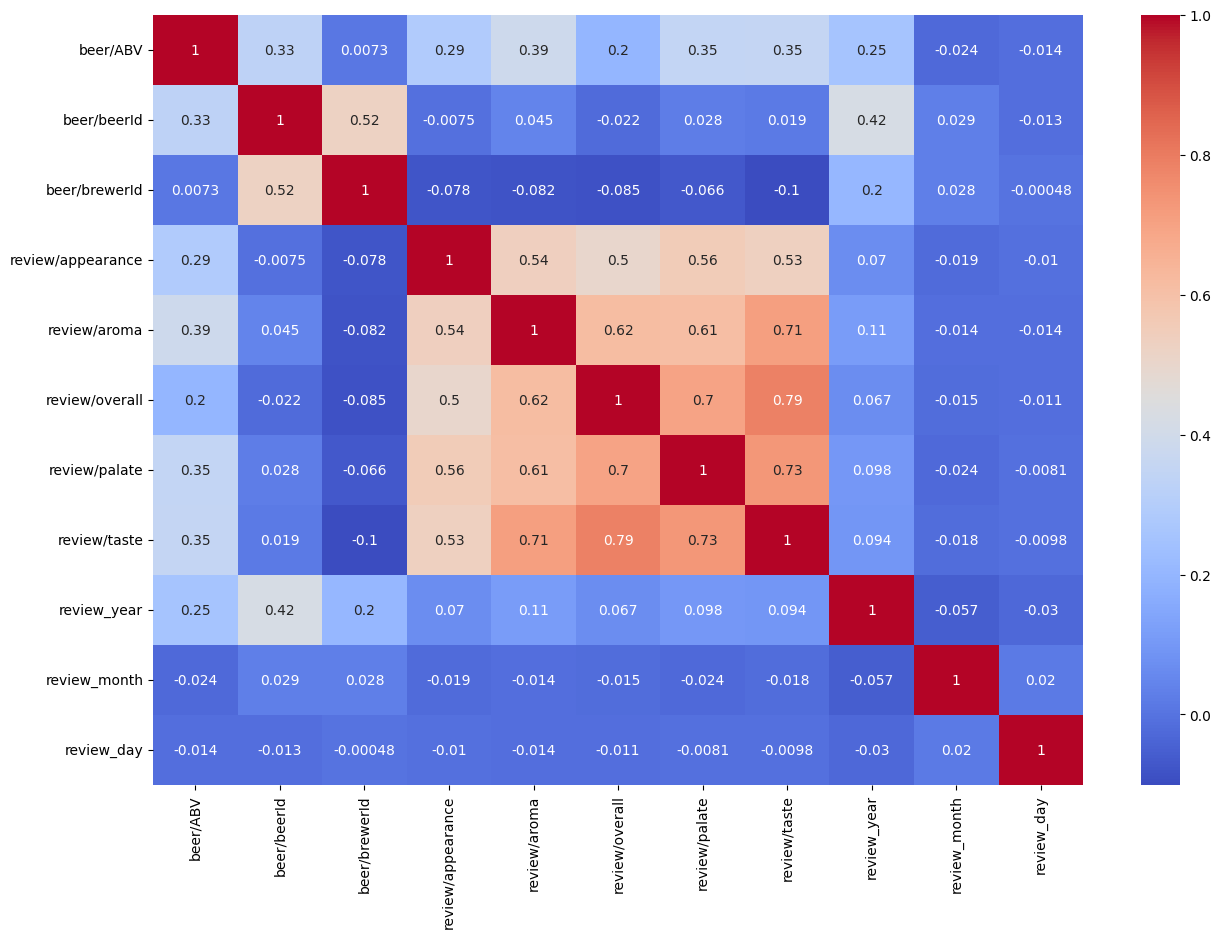

In [ ]:

numeric_df = df.select_dtypes(include=[float, int])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot = True)

# 2. Feature Engineering

# **Now analyze beer/style column and do modification if required**

In [ ]:
df['beer/style'].value_counts()

,count
beer/style,
American Double / Imperial Stout,4493
American IPA,3048
American Double / Imperial IPA,2871
Scotch Ale / Wee Heavy,2133
Russian Imperial Stout,2030
...,...
Kristalweizen,6
Berliner Weissbier,6
Eisbock,5


In [ ]:

style_mean_ratings = df.groupby('beer/style')['review/overall'].mean()

df['style_encoded'] = df['beer/style'].map(style_mean_ratings)


correlation = df[['style_encoded', 'review/overall']].corr().iloc[0, 1]
print("Correlation between 'beer/style' and 'overall rating':", correlation)

Correlation between 'beer/style' and 'overall rating': 0.42541185103843915


**'beer/style'** have correlation with overall rating so we can utilize this column and convert into One-Hot-Encoding,

In [ ]:
beer_style_onehot=OneHotEncoder()
beer_style_encoder=beer_style_onehot.fit_transform(df[['beer/style']]).toarray()
beer_style_encoder

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df.shape

(37489, 15)

In [ ]:
beer_style_onehot.get_feature_names_out(['beer/style'])

array(['beer/style_Altbier', 'beer/style_American Adjunct Lager',
       'beer/style_American Amber / Red Ale',
       'beer/style_American Amber / Red Lager',
       'beer/style_American Barleywine', 'beer/style_American Black Ale',
       'beer/style_American Blonde Ale', 'beer/style_American Brown Ale',
       'beer/style_American Dark Wheat Ale',
       'beer/style_American Double / Imperial IPA',
       'beer/style_American Double / Imperial Pilsner',
       'beer/style_American Double / Imperial Stout',
       'beer/style_American IPA', 'beer/style_American Malt Liquor',
       'beer/style_American Pale Ale (APA)',
       'beer/style_American Pale Lager',
       'beer/style_American Pale Wheat Ale', 'beer/style_American Porter',
       'beer/style_American Stout', 'beer/style_American Strong Ale',
       'beer/style_American Wild Ale', 'beer/style_Baltic Porter',
       'beer/style_Belgian Dark Ale', 'beer/style_Belgian IPA',
       'beer/style_Belgian Pale Ale',
       'beer/sty

In [ ]:
beerstyle_encoded_df=pd.DataFrame(beer_style_encoder,columns=beer_style_onehot.get_feature_names_out(['beer/style']))
beerstyle_encoded_df

,beer/style_Altbier,beer/style_American Adjunct Lager,beer/style_American Amber / Red Ale,beer/style_American Amber / Red Lager,beer/style_American Barleywine,beer/style_American Black Ale,beer/style_American Blonde Ale,beer/style_American Brown Ale,beer/style_American Dark Wheat Ale,beer/style_American Double / Imperial IPA,...,beer/style_Scotch Ale / Wee Heavy,beer/style_Scottish Ale,beer/style_Scottish Gruit / Ancient Herbed Ale,beer/style_Smoked Beer,beer/style_Tripel,beer/style_Vienna Lager,beer/style_Weizenbock,beer/style_Wheatwine,beer/style_Winter Warmer,beer/style_Witbier
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Now analyze beer/name column**

In [ ]:
df["beer/name"].value_counts()

,count
beer/name,
Founders Breakfast Stout,1883
Founders KBS (Kentucky Breakfast Stout),1439
Founders Centennial IPA,1063
Founders Red's Rye PA,1051
Founders Dirty Bastard,983
...,...
Bluffdiver IPA,1
Montgomery Mild,1
Willy's Crown Jewels,1


In [ ]:
rating_beer_name = df.groupby('beer/name')['beer/ABV'].agg(['min', 'max','mean', 'count']).reset_index()
rating_beer_name_sorted = rating_beer_name.sort_values(by='count', ascending=False).reset_index(drop=True)
print(rating_beer_name_sorted)

                                    beer/name   min   max  mean  count
0                    Founders Breakfast Stout   8.3   8.3   8.3   1883
1     Founders KBS (Kentucky Breakfast Stout)  11.2  11.2  11.2   1439
2                     Founders Centennial IPA   7.2   7.2   7.2   1063
3                       Founders Red's Rye PA   6.6   6.6   6.6   1051
4                      Founders Dirty Bastard   8.5   8.5   8.5    983
...                                       ...   ...   ...   ...    ...
1683                                Krut Gold   5.5   5.5   5.5      1
1684                               Red Breast   4.5   4.5   4.5      1
1685                    Caldera Oatmeal Stout   7.2   7.2   7.2      1
1686                           Caldera OBF 15   5.6   5.6   5.6      1
1687                               Pszeniczne   5.0   5.0   5.0      1

[1688 rows x 5 columns]


# **beer/name** is higly correlated with **beer/ABV** column.So we can drop **beer/name** from our dataset for analyze target varriable.

In [ ]:
df = df.drop(['beer/style', 'beer/beerId','beer/brewerId', 'beer/name'], axis = 1)

In [ ]:
df.shape

(37489, 11)

In [ ]:
df = pd.concat([df, beerstyle_encoded_df], axis=1)

In [ ]:
df.shape

(37489, 106)

In [ ]:
!pip install sweetviz
import sweetviz as sv
report = sv.analyze(df)

# Display the report in a web browser
report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 2. Feature Engineering

In [ ]:
# Define features  target variable (y)
y = df['review/overall']  # Target variable
#y = df['review/overall'].astype(str)

In [46]:
df['review/text'] = df['review/text'].str.replace('[^a-zA-Z]', ' ').str.lower()
df['review/text'][0]

'pours a clouded gold with a thin white head. nose is quite floral with a larger amount of spices added. definitely a spice forward fragrance. flavor has an odd burn that hits on the first sip. after it fades it seems like a dirty vanilla aftertaste. perhaps this is the absinthe? regardless of that, i get a quite spiced tone on the tongue. almost feel a little heat from it. i think that my inexperienced palate on these spices is contributing to my ignorance of what precisely they are. overall a nice drinker indeed.'

In [47]:
# Apply TF-IDF directly after this basic preprocessing
tfidf = TfidfVectorizer(max_features=500, ngram_range=(2,4), stop_words='english')
X_rev = tfidf.fit_transform(df['review/text']).toarray()

# **Importance top 10 words strongly predict overall rating according Tfidf**

In [49]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_rev, y)

# Get the coefficients from the model
coefficients = model.coef_

# Create a DataFrame to show the importance of each word
importance_df = pd.DataFrame({
    'Word': tfidf.get_feature_names_out(),
    'Coefficient': coefficients
})

# Sort by absolute value of the coefficient to get the most influential words
importance_df['Importance'] = importance_df['Coefficient'].apply(np.abs)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important words
print(importance_df.head(10))
print(importance_df.tail(10))

                   Word  Coefficient  Importance
257  highly recommended     1.006365    1.006365
256    highly drinkable     0.947468    0.947468
22             bad beer    -0.825301    0.825301
286          just right     0.711416    0.711416
418         pours pitch     0.705948    0.705948
137           damn good     0.701604    0.701604
221          great beer     0.638811    0.638811
419   pours pitch black    -0.615835    0.615835
281           jet black     0.613078    0.613078
113    coffee chocolate     0.604713    0.604713
                     Word  Coefficient  Importance
353  moderate carbonation    -0.006068    0.006068
180     finger white head     0.004378    0.004378
268          hop presence     0.004352    0.004352
423             quite bit     0.003760    0.003760
452           smell taste    -0.003229    0.003229
382          orange amber     0.001957    0.001957
359       mouthfeel light    -0.001570    0.001570
88       carbonation good     0.000947    0.000947
40

In [50]:
# Convert TF-IDF features to a DataFrame
tfidf_df = pd.DataFrame(X_rev, columns=tfidf.get_feature_names_out())
tfidf_df.index = df.index

In [51]:
tfidf_df

,12 ounce,12 oz,12 oz bottle,12 oz bottle poured,12oz bottle,12oz bottle poured,22 oz,500ml bottle,alcohol burn,alcohol content,...,vanilla bourbon,vanilla oak,ve tried,warming alcohol,white foam,white head,white head aroma,white head leaves,worth try,yellow color
0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.309874,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.00000,0.0,0.330952,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.175845,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37484,0.0,0.273358,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
37485,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
37486,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.269021,0.000000,0.0,0.0,0.0,0.0
37487,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [52]:
df_combined = pd.concat([df, tfidf_df], axis=1)

In [53]:
X = df_combined.drop(['review/overall', 'review/text'], axis=1)  # Drop target and any non-feature columns
X.shape

(37489, 604)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **ML Model Implementation**

In [55]:

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "HistGradient Boosting": HistGradientBoostingRegressor(),

}

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dictionary to store the metrics for each model
validation_metrics = {}

for model_name, model in models.items():
    # Fit the model on training data
    model.fit(X_train, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for training data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate metrics for test data
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)


    validation_metrics[model_name] = {
        'Train MAE': train_mae,
        'Train MSE': train_mse,
        'Train RMSE': train_rmse,
        'Train R²': train_r2,
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test R²': test_r2
    }


for model_name, metrics in validation_metrics.items():
    print(f"\nModel: {model_name}")
    print(f"Train Mean Absolute Error (MAE): {metrics['Train MAE']:.3f}")
    print(f"Train Mean Squared Error (MSE): {metrics['Train MSE']:.3f}")
    print(f"Train Root Mean Squared Error (RMSE): {metrics['Train RMSE']:.3f}")
    print(f"Train R-Squared (R²): {metrics['Train R²']:.3f}")
    print(f"Test Mean Absolute Error (MAE): {metrics['Test MAE']:.3f}")
    print(f"Test Mean Squared Error (MSE): {metrics['Test MSE']:.3f}")
    print(f"Test Root Mean Squared Error (RMSE): {metrics['Test RMSE']:.3f}")
    print(f"Test R-Squared (R²): {metrics['Test R²']:.3f}")

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the model
model = HistGradientBoostingRegressor()

# Set up the parameter grid for tuning
param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_iter': [100, 200],
    'max_leaf_nodes': [10, 20],
    'min_samples_leaf': [10, 20],
    'l2_regularization': [0, 0.1]
}

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    model, param_grid, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

# Get the best parameters and the best R² score
print("Best Parameters: ", random_search.best_params_)
print("Best Cross-Validated R²: ", random_search.best_score_)



### **Model: Linear Regression**

Train Mean Absolute Error (MAE): 0.298

Train Mean Squared Error (MSE): 0.152

Train Root Mean Squared Error (RMSE): 0.390

Train R-Squared (R²): 0.690

Test Mean Absolute Error (MAE): 0.306

Test Mean Squared Error (MSE): 0.161

Test Root Mean Squared Error (RMSE): 0.401

Test R-Squared (R²): 0.674

### **Model: Random Forest**

Train Mean Absolute Error (MAE): 0.112

Train Mean Squared Error (MSE): 0.022

Train Root Mean Squared Error (RMSE): 0.150

Train R-Squared (R²): 0.954

Test Mean Absolute Error (MAE): 0.306

Test Mean Squared Error (MSE): 0.164

Test Root Mean Squared Error (RMSE): 0.405

Test R-Squared (R²): 0.667

### **Model: Gradient Boosting**

Train Mean Absolute Error (MAE): 0.294

Train Mean Squared Error (MSE): 0.147

Train Root Mean Squared Error (RMSE): 0.383

Train R-Squared (R²): 0.700

Test Mean Absolute Error (MAE): 0.301

Test Mean Squared Error (MSE): 0.155

Test Root Mean Squared Error (RMSE): 0.394

Test R-Squared (R²): 0.686

### **Model: HistGradient Boosting**

Train Mean Absolute Error (MAE): 0.284

Train Mean Squared Error (MSE): 0.137

Train Root Mean Squared Error (RMSE): 0.371

Train R-Squared (R²): 0.719

Test Mean Absolute Error (MAE): 0.300

Test Mean Squared Error (MSE): 0.154

Test Root Mean Squared Error (RMSE): 0.392

Test R-Squared (R²): 0.688

# **Conclusion:-**

Among the models tested,

**HistGradient Boosting** performed the best overall on the test set, showing the lowest Test **Mean Squared Error (0.154)**, **lowest Test Root Mean Squared Error (0.392)**, and the **highest Test R² (0.688)**, indicating a good balance of accuracy and error minimization.

The **Gradient Boosting** model closely followed, with similar metrics. Linear Regression and Random Forest had comparable errors, but their Test R² values were slightly lower, indicating marginally weaker predictive power.